# Analysis script of the remaining intermolecular clashes, cross correlation with the density map and the probe score 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

Functions required for the import of all files 

In [3]:
def get_ref():
    """returns a DataFrame containing all the reference structure values"""
    clash_df = pd.read_csv("data/reference-clashes.csv", index_col = 0)
    cor_df = pd.read_csv("data/reference-correlation.csv", index_col = 0)
    ref_df = clash_df.join(cor_df["correlation"])
    return ref_df

def get_ref_cor():
    cor_df = pd.read_csv("data/reference-correlation.csv", index_col = 0)
    return cor_df

def make_water_df_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_correlation.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_correlation.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_correlation.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_correlation.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_correlation.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_correlation.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_correlation.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_correlation.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_correlation.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_correlation.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_correlation.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_correlation.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_correlation.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_correlation.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list


def probe_ref():
    """returns a DataFrame containing all the reference structure values"""
    probe_df = pd.read_csv("data/ref-probe.csv", index_col = 0)
    return probe_df


def make_probe_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_probe.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_probe.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_probe.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_probe.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_probe.csv").format(run), index_col = "structure")
    df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_probe.csv").format(run), index_col = "structure")
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_probe.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_probe.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_probe.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_probe.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_probe.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_probe.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_probe.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_probe.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
        df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [4]:
runs =[
    "SA", "SA_CA", 
    "SA_SR","SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   


In [5]:
top = 4

Analysis of the atomic clashes 

In [6]:
clash_df = pd.DataFrame()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        df = df.sort_values("HADDOCK-score")[0:top].reset_index().drop("structure", axis=1)
        data_frame = pd.concat([data_frame, df], ignore_index=True)
    clash_df = pd.concat([clash_df, data_frame["atomic-clashes"]], axis=1, ignore_index=True)

Analysis of the probe-score

In [7]:
probe_df = pd.DataFrame()
for run in runs:
    df_list = make_probe_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        df = df.iloc[:,1]
        data_frame = pd.concat([data_frame, df], ignore_index=True)
    probe_df = pd.concat([probe_df, data_frame], axis=1, ignore_index=True)

Analysis of the cross-correlation

In [8]:
ref_df = get_ref()
cor_df = pd.DataFrame()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        structure = df.index[0][:4]
        df = df.sort_values("HADDOCK-score")[0:top].reset_index().drop("structure", axis=1)
        df = df.sub(ref_df.loc[structure, "correlation"])
        data_frame = pd.concat([data_frame, df], ignore_index=True)
    cor_df = pd.concat([cor_df, data_frame["correlation"]], axis=1, ignore_index=True)

Plotting the three dataframes

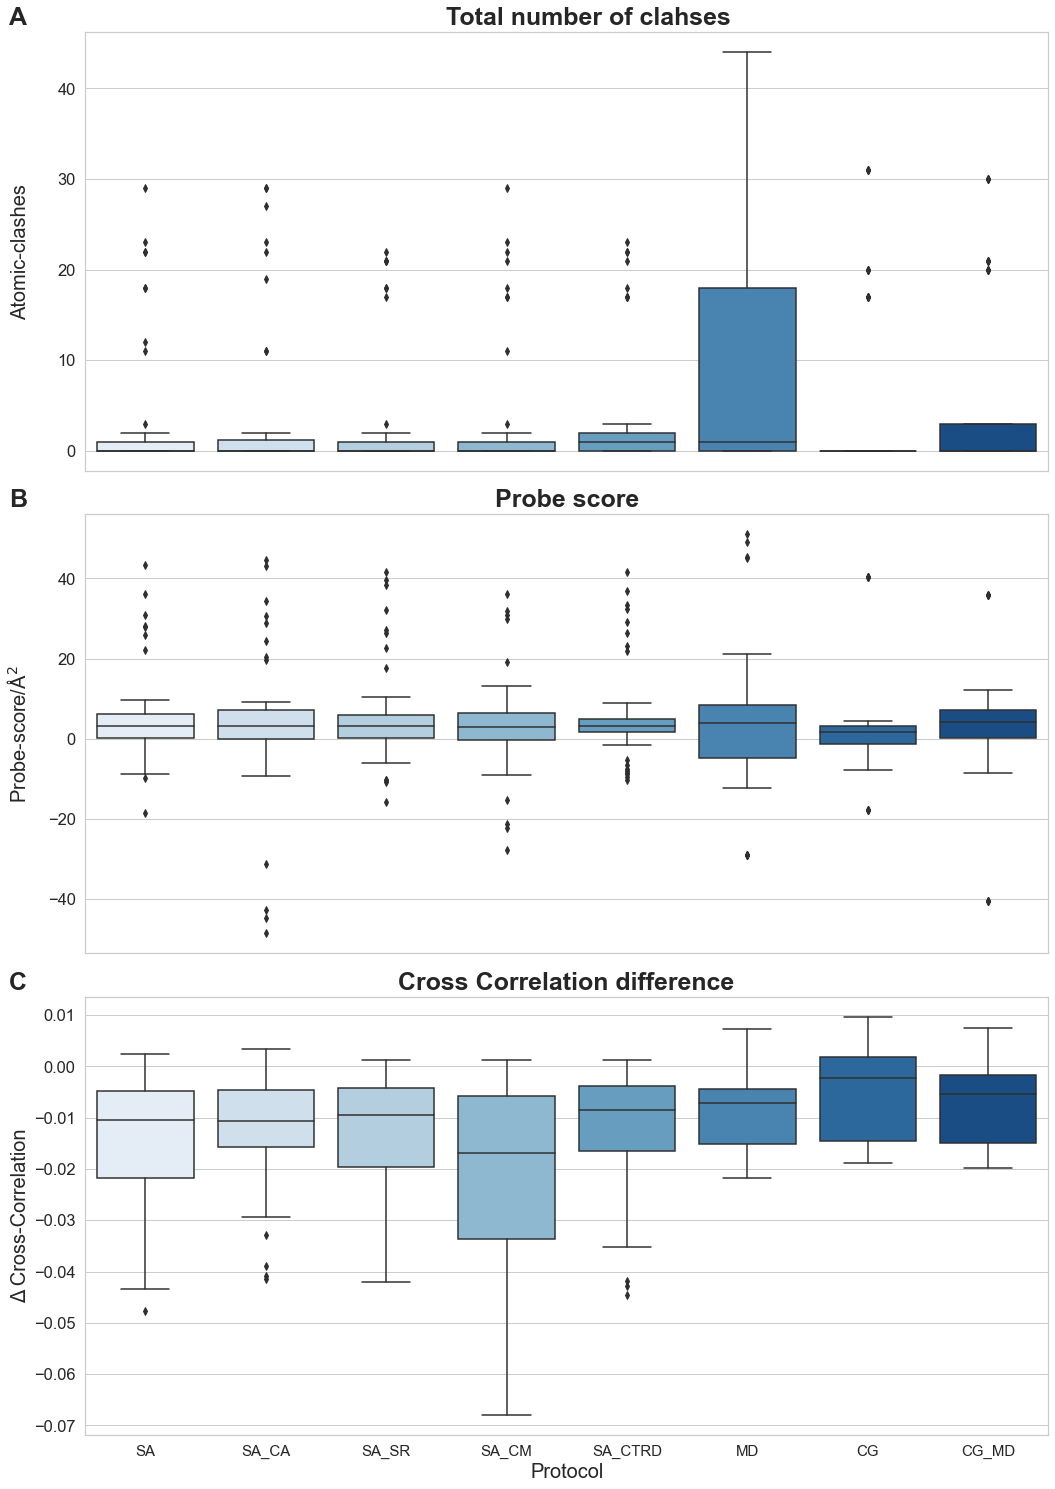

In [12]:
fig, ax = plt.subplots(nrows=3, figsize=(15,21))
sns.set(font_scale=1.5, style="whitegrid")


# fill the plots
clash_plot = sns.boxplot(data=clash_df, ax=ax[0], palette="Blues")
probe_plot = sns.boxplot(data = probe_df, ax=ax[1], palette="Blues")
cor_plot = sns.boxplot(data=cor_df, ax=ax[2], palette="Blues")


# cor_plot.set_title("Top 4 analysis of {} cryo-EM models".format(len(succes_list)), fontsize = 30)

clash_plot.set_xticks([])
probe_plot.set_xticks([])
cor_plot.set_xticklabels(runs, fontsize=15)



cor_plot.set_ylabel("Δ Cross-Correlation", fontsize=20)
clash_plot.set_ylabel("Atomic-clashes", fontsize=20)
probe_plot.set_ylabel("Probe-score/Å$^2$", fontsize=20)
cor_plot.set_xlabel("Protocol", fontsize=20)

clash_plot.text(2.5,47,"Total number of clahses", fontsize=25, weight="semibold")
clash_plot.text(-1.13,47,"A", fontsize=25, weight="semibold")


probe_plot.text(2.9,58,"Probe score", fontsize=25, weight="semibold")
probe_plot.text(-1.13,58,"B", fontsize=25, weight="semibold")

cor_plot.text(2.1,0.015,"Cross Correlation difference", fontsize=25, weight="semibold")
cor_plot.text(-1.13,0.015,"C", fontsize=25, weight="semibold")

fig.align_ylabels(ax[:])
plt.tight_layout()
plt.savefig("Figure_3.pdf", dpi=300, bbox_inches='tight')

# statistics 

In [38]:
ref_clash_mean = ref_df.loc[:,"clashes"].mean()
clash_mean = clash_df.iloc[:,0:5].mean()
cent_clash = pd.DataFrame()
for i in range(6):
    cent_clash = pd.concat([cent_clash, clash_df.iloc[:,i]], ignore_index=True)
clash_removal = (100 - (clash_mean / ref_clash_mean) * 100)
all_mean = clash_removal.mean()
all_std = clash_removal.std()
print(all_mean, all_std)

print(cent_clash.mean(), cent_clash.std())

98.23482744942484 0.1462503094382428
0    3.997024
dtype: float64 0    8.64611
dtype: float64


In [39]:
ref_clash_df = ref_df.loc[:,"clashes"]
ref_pos = 0
iteration = 0
percentage_df = pd.DataFrame()
ref_list = []

for ref in ref_clash_df:
    for i in range(4):
        ref_list.append(ref)
    
ref_list
per_clash_df = (100 - clash_df.transpose() / ref_list * 100).transpose()
per_clash_df.describe()
# all_per_clash = []
# for i in range(5):
#     for j in per_clash_df[i]:
#         all_per_clash.append(j)

# all_per_clash_df = pd.Series(all_per_clash)
# print(all_per_clash_df.mean(), all_per_clash_df.std())


    
    

,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,99.031614,98.644785,98.831490,98.118667,98.410939,63.123006,96.332089,95.747326
std,1.719243,2.865270,2.449886,3.327869,2.213734,116.256837,11.751072,11.751663
min,93.333333,83.333333,87.500000,83.333333,91.666667,-350.000000,54.545455,54.545455
25%,98.606652,97.401247,98.361823,97.222222,97.278529,94.444444,100.000000,97.150997
50%,100.000000,100.000000,100.000000,100.000000,99.189189,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [41]:
clash_df.describe()

,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,3.035714,3.357143,2.803571,3.232143,3.464286,8.089286,4.857143,5.285714
std,7.083821,7.891142,6.515491,7.096711,6.787594,13.536854,9.796899,9.941125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.250000,1.000000,1.000000,2.000000,18.000000,0.000000,3.000000
max,29.000000,29.000000,22.000000,29.000000,23.000000,44.000000,31.000000,30.000000


In [42]:
probe_df.describe()

,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,5.209821,3.380893,5.440536,3.511964,5.422857,4.333929,1.903750,2.108393
std,11.192528,16.959516,11.871973,11.323069,11.501559,16.725391,12.233564,15.436564
min,-18.610000,-48.570000,-15.750000,-27.940000,-10.300000,-28.980000,-17.790000,-40.470000
25%,0.092500,-0.105000,0.070000,-0.340000,1.587500,-4.790000,-1.340000,0.190000
50%,3.140000,3.175000,3.080000,2.895000,3.040000,3.860000,1.700000,4.120000
75%,6.247500,7.080000,5.790000,6.405000,4.940000,8.475000,3.100000,7.220000
max,43.330000,44.570000,41.710000,36.050000,41.610000,51.010000,40.330000,35.810000


In [43]:
cor_df.describe()


,0,1,2,3,4,5,6,7
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.013163,-0.012514,-0.012898,-0.022554,-0.011805,-0.009836,-0.004995,-0.007225
std,0.012089,0.011172,0.011902,0.021053,0.011492,0.006579,0.009461,0.008334
min,-0.047600,-0.041400,-0.042100,-0.068000,-0.044600,-0.021500,-0.018900,-0.018800
25%,-0.021675,-0.015675,-0.019700,-0.033750,-0.016425,-0.015325,-0.014500,-0.014900
50%,-0.010500,-0.010700,-0.009500,-0.016800,-0.008550,-0.009100,-0.002300,-0.007350
75%,-0.004775,-0.004575,-0.004300,-0.005800,-0.003750,-0.004700,0.001900,-0.001600
max,0.002300,0.003300,0.001300,0.001200,0.001300,0.001800,0.009700,0.007500


Final molprobity analysis

In [18]:
probe_ref_df = probe_ref()
probe_ref_df.describe()

,probe-score,probe-score/A**2
count,14.000000,14.000000
mean,-2367.257143,-60.548571
std,2470.671437,99.733722
min,-8986.100000,-395.950000
25%,-2727.950000,-51.805000
50%,-1366.500000,-27.470000
75%,-742.700000,-19.545000
max,-114.900000,-2.730000
